In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# config style
sns.set_style("darkgrid")
sns.set_palette("GnBu_d", 3)

In [3]:
data_raw = pd.read_csv('nyc_flights_fixed.csv')

In [4]:
data_raw.head()

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,0,2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01T10:00:00Z
1,1,2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01T10:00:00Z
2,2,2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01T10:00:00Z
3,3,2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01T11:00:00Z
4,4,2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01T10:00:00Z


In [64]:
df_grouped = data_raw.groupby(['year', 'month']).agg({'dep_delay':'sum'}).reset_index()
df_grouped['cumsum'] = df_grouped['dep_delay'].transform(pd.Series.cumsum)

In [65]:
df_grouped

,year,month,dep_delay,cumsum
0,2013,1,235034,235034
1,2013,2,222863,457897
2,2013,3,333070,790967
3,2013,4,328093,1119060
4,2013,5,314223,1433283
5,2013,6,490911,1924194
6,2013,7,535995,2460189
7,2013,8,315761,2775950
8,2013,9,159860,2935810
9,2013,10,164626,3100436


In [66]:
df_sum = df_grouped.rename(columns={'dep_delay': 'sum_delay'},)
df_sum.head()

,year,month,sum_delay,cumsum
0,2013,1,235034,235034
1,2013,2,222863,457897
2,2013,3,333070,790967
3,2013,4,328093,1119060
4,2013,5,314223,1433283


In [71]:
df_sum['year_month'] = df_sum['year'].astype(str) + '-' + df_sum['month'].astype(str) 

In [72]:
df_sum

,year,month,sum_delay,cumsum,year_month
0,2013,1,235034,235034,2013-1
1,2013,2,222863,457897,2013-2
2,2013,3,333070,790967,2013-3
3,2013,4,328093,1119060,2013-4
4,2013,5,314223,1433283,2013-5
5,2013,6,490911,1924194,2013-6
6,2013,7,535995,2460189,2013-7
7,2013,8,315761,2775950,2013-8
8,2013,9,159860,2935810,2013-9
9,2013,10,164626,3100436,2013-10


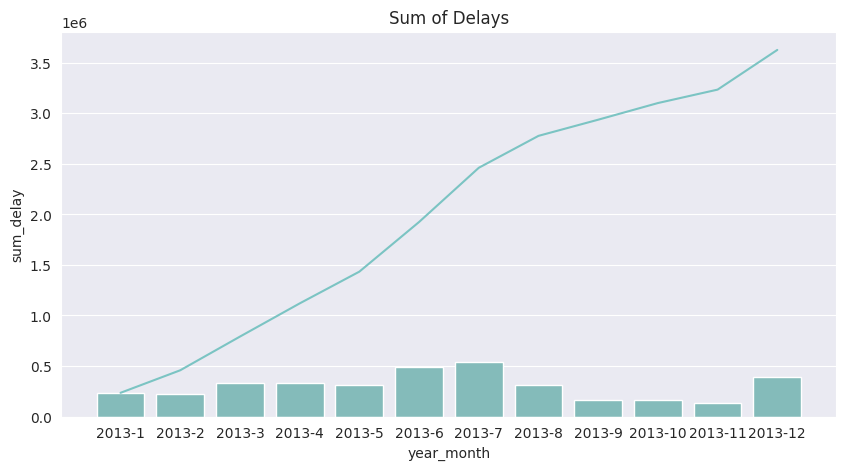

In [75]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=df_sum, x='year_month', y='sum_delay').set_title('Sum of Delays')
sns.lineplot(data=df_sum,  x='year_month', y='cumsum')

plt.show()

In [39]:
df_year_month_sum.sort_values(by='sum_delay', ascending=False).head(3)

,year,month,sum_delay,year_month
6,2013,7,392256,2013-7
9,2013,10,386826,2013-10
7,2013,8,385013,2013-8
